<a href="https://colab.research.google.com/github/EdeEsteban/Analitica-de-Datos/blob/main/Analitica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Super Bowl**

El super bowl es un espectáculo enfocado en el futbol americano  (Es el nombre que se le da al partido final del campeonato de la National Football League  por sus siglas en ingles (NFL)), en el que se enfrentan los campeones de la Conferencia Nacional (NFC) y de la Conferencia Americana (AFC). Se disputa el segundo domingo del mes de febrero y debe su nombre a Lamar Hunt, antiguo propietario de Kansas City Chiefs, quien lo llamó así para diferenciarlo del resto de bowls que se disputaban. [https://es.wikipedia.org/wiki/Super_Bowl]. Este espectáculo  incluye musicos famosos, automatas mecanicos gigantes y todo tipo de entretenimiento. Hay dramas, controversias, anuncios, fiestas, todo para los aficionados al deporte.  Nuestro trabajo en el super bowl, es responder a preguntas relacionadas como:

*   **¿Cuál es la mayor y menor diferencia de puntos en cada partido?** 

*   **¿Cuál es el equipo que más veces ha ganado o perdido?**

*   **¿Cuál es el equipo que más veces ha participado y el que menos ha participado?**

*   **¿Cuál ha sido el superbowl que más ha tenido  mayor audiencia, tanto televisivamente como presencialmente?**






---





Para empezar con el desarrollo del proyecto se importarán las siguientes librerías:

*   **Numpy:** Librería usada para manipular arreglos. Se importa usualmente con el alias `np` de la siguiente manera: `import numpy as np`
*   **Pandas:** Librería empleada para manejar DataFrame y manipulación de datos. Se importa usualmente con el alias `pd` de la siguiente manera: `import` pandas as pd
*   **Seaborn:** Librería para realizar gráficos estadísticos y visualización de datos. Se importa usualmente con el alias `sns` de la siguiente manera: `import seaborn as sns`
*   **Matplotlib:** Librería para realizar gráficos, en particular se usará usaremos `pyplot` que facilita la creación de estos. Se importa usualmente con el alias `plt` de la siguiente manera: `import matplotlib.pyplot as plt`

*   **Geopandas**: Es un proyecto de código abierto para facilitar el trabajo con datos geoespaciales en python. GeoPandas amplía los tipos de datos utilizados por pandas para permitir operaciones espaciales en tipos geométricos.



**Análisis Estadístico:**


En el análisis estadístico,  se usará la estadística descriptiva y se realizará con dos tablas como uso de bases de datos (Denotadas Tabla 1 y Tabla 2), el cual se procederá a la limpieza de datos y realizar las  siguientes medidas:

 * **Medida a la tendencia central.** 

* **Medida de variabilidad ( o dispersión).**

En las medidas de tendencia central se incluyen la media, la mediana y la moda y en las medidas de variabilidad incluyen desviación estándar (o varianza), los valores mínimo y máximo de las variables y la curtosis 

In [ ]:
!pip install geopandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
#import geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 6.3 MB 34.4 MB/s 
     |████████████████████████████████| 16.7 MB 835 kB/s 


### **Tabla 1: Super Bowl**

Importamos la información de la lista de ganadores del Super Bowl desde Wikipedia, trabajaremos inicialmente con la tabla "Super Bowl championships" que es un resumen de los ganadores y perdedores del Super Bowl.

In [ ]:
super_bowl = pd.read_html("https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions")

#Tabla básica importada de Wikipedia
championships = super_bowl[1] #El [1] es porque hay mas bases de datos, entonces seleccionamos la que necesitamos
championships.head()

,Game,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Referee,Ref
0,I[sb 1],"January 15, 1967 (1966 AFL/1966 NFL)","Green Bay Packersn(1, 1–0)",35–10,"Kansas City Chiefsa(1, 0–1)",Los Angeles Memorial Coliseum,"Los Angeles, California[sb 2]",61946,Norm Schachter,[7][8]
1,II[sb 1],"January 14, 1968 (1967 AFL/1967 NFL)","Green Bay Packersn(2, 2–0)",33–14,"Oakland Raidersa(1, 0–1)",Miami Orange Bowl,"Miami, Florida[sb 3]",75546,Jack Vest,[9][8]
2,III[sb 1],"January 12, 1969 (1968 AFL/1968 NFL)","New York Jetsa(1, 1–0)",16–7,"Baltimore Coltsn(1, 0–1)",Miami Orange Bowl (2),"Miami, Florida (2)[sb 3]",75389,Tom Bell,[10][8]
3,IV[sb 1],"January 11, 1970 (1969 AFL/1969 NFL)","Kansas City Chiefsa(2, 1–1) [S]",23–7,"Minnesota Vikingsn(1, 0–1)",Tulane Stadium,"New Orleans, Louisiana",80562,John McDonough,[11][8]
4,V,"January 17, 1971 (1970)","Baltimore ColtsA(2, 1–1)",16–13,"Dallas CowboysN(1, 0–1)",Miami Orange Bowl (3),"Miami, Florida (3)[sb 3]",79204,Norm Schachter,[12][8]


Observamos que tenemos una base de datos muy sucia, por lo que procedemos a limpiarla.

Para ello, primero eliminaremos la columna "Ref"

In [ ]:
championships = championships.drop(['Ref'], axis=1)  #'axis = 1' hace referencia a las columnas.
championships.head()


,Game,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Referee
0,I[sb 1],"January 15, 1967 (1966 AFL/1966 NFL)","Green Bay Packersn(1, 1–0)",35–10,"Kansas City Chiefsa(1, 0–1)",Los Angeles Memorial Coliseum,"Los Angeles, California[sb 2]",61946,Norm Schachter
1,II[sb 1],"January 14, 1968 (1967 AFL/1967 NFL)","Green Bay Packersn(2, 2–0)",33–14,"Oakland Raidersa(1, 0–1)",Miami Orange Bowl,"Miami, Florida[sb 3]",75546,Jack Vest
2,III[sb 1],"January 12, 1969 (1968 AFL/1968 NFL)","New York Jetsa(1, 1–0)",16–7,"Baltimore Coltsn(1, 0–1)",Miami Orange Bowl (2),"Miami, Florida (2)[sb 3]",75389,Tom Bell
3,IV[sb 1],"January 11, 1970 (1969 AFL/1969 NFL)","Kansas City Chiefsa(2, 1–1) [S]",23–7,"Minnesota Vikingsn(1, 0–1)",Tulane Stadium,"New Orleans, Louisiana",80562,John McDonough
4,V,"January 17, 1971 (1970)","Baltimore ColtsA(2, 1–1)",16–13,"Dallas CowboysN(1, 0–1)",Miami Orange Bowl (3),"Miami, Florida (3)[sb 3]",79204,Norm Schachter


Ahora vemos que la fila número 56 no tiene datos, por lo que la eliminamos.

In [ ]:
championships = championships.drop(56,axis=0)  # 'axis = 0' hace referencia  las filas.
championships.tail()

,Game,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Referee
51,LII,"February 4, 2018 (2017)","Philadelphia EaglesN(3, 1–2)",41–33,"New England PatriotsA(10, 5–5)",U.S. Bank Stadium,"Minneapolis, Minnesota (2)",67612,Gene Steratore
52,LIII,"February 3, 2019 (2018)","New England PatriotsA(11, 6–5)",13–3,"Los Angeles RamsN(4, 1–3)",Mercedes-Benz Stadium,"Atlanta, Georgia (3)",70081,John Parry
53,LIV,"February 2, 2020 (2019)","Kansas City ChiefsA(3, 2–1)",31–20,"San Francisco 49ersN(7, 5–2)",Hard Rock Stadium (6)[sb 12],"Miami Gardens, Florida (11)[sb 3]",62417,Bill Vinovich
54,LV,"February 7, 2021 (2020)","Tampa Bay BuccaneersN(2, 2–0) [W]",31–9,"Kansas City ChiefsA(4, 2–2)",Raymond James Stadium (3),"Tampa, Florida (5)",24835,Carl Cheffers
55,LVI,"February 13, 2022 (2021)","Los Angeles RamsN(5, 2–3)",23–20,"Cincinnati BengalsA(3, 0–3)",SoFi Stadium,"Inglewood, California (8)[sb 2]",70048,Ron Torbert


Vamos a ahora a quitar todos los caracteres que estén entre corchetes.

In [ ]:
#Función para quitar todo lo que esté entre corchetes ->[] 
def quitarcorchete(texto):
  for i in range(len(texto)):     
    if texto[i] == "[":
      inicio = i
    elif texto[i] == "]":
      fin = i + 1
      texto = texto[:inicio] + texto[fin:]
      break
  return texto  

#Función para quitar el espacio vacio al final -> " " 
def quitarvaciof(texto):
  if texto[-1] == " ":
    texto = texto[:-1]
  return texto 

#Usamos las funciones sobre todas las entradas para una primera limpieza
for col in  championships.columns:
  for entry in range(championships.shape[0]):
           
    championships[col][entry]  = quitarcorchete(championships[col][entry])
    championships[col][entry]  = quitarcorchete(championships[col][entry])    
    championships[col][entry]  = quitarvaciof(championships[col][entry])
    
#Se pasa dos veces la función 'quitarcorchete' debido a que existen valores donde aparecen dos veces los valores con corchete 

championships.head()


,Game,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Referee
0,I,"January 15, 1967 (1966 AFL/1966 NFL)","Green Bay Packersn(1, 1–0)",35–10,"Kansas City Chiefsa(1, 0–1)",Los Angeles Memorial Coliseum,"Los Angeles, California",61946,Norm Schachter
1,II,"January 14, 1968 (1967 AFL/1967 NFL)","Green Bay Packersn(2, 2–0)",33–14,"Oakland Raidersa(1, 0–1)",Miami Orange Bowl,"Miami, Florida",75546,Jack Vest
2,III,"January 12, 1969 (1968 AFL/1968 NFL)","New York Jetsa(1, 1–0)",16–7,"Baltimore Coltsn(1, 0–1)",Miami Orange Bowl (2),"Miami, Florida (2)",75389,Tom Bell
3,IV,"January 11, 1970 (1969 AFL/1969 NFL)","Kansas City Chiefsa(2, 1–1)",23–7,"Minnesota Vikingsn(1, 0–1)",Tulane Stadium,"New Orleans, Louisiana",80562,John McDonough
4,V,"January 17, 1971 (1970)","Baltimore ColtsA(2, 1–1)",16–13,"Dallas CowboysN(1, 0–1)",Miami Orange Bowl (3),"Miami, Florida (3)",79204,Norm Schachter


Ahora eliminamos los datos que están entre paréntesis

In [ ]:
#(Esta parte se podría optimizar con la función de Cristian)

championships["Winning team"] = championships["Winning team"].str.replace(r"\(.*\)","")
championships["Losing team"] = championships["Losing team"].str.replace(r"\(.*\)","")
championships["Date/Season"] = championships["Date/Season"].str.replace(r"\(.*\)","")
championships["Score"] = championships["Score"].str.replace(r"\(.*\)","")
championships["Venue"] = championships["Venue"].str.replace(r"\(.*\)","")
championships["City"] = championships["City"].str.replace(r"\(.*\)","")


championships.head()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: Fu

,Game,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Referee
0,I,"January 15, 1967",Green Bay Packersn,35–10,Kansas City Chiefsa,Los Angeles Memorial Coliseum,"Los Angeles, California",61946,Norm Schachter
1,II,"January 14, 1968",Green Bay Packersn,33–14,Oakland Raidersa,Miami Orange Bowl,"Miami, Florida",75546,Jack Vest
2,III,"January 12, 1969",New York Jetsa,16–7,Baltimore Coltsn,Miami Orange Bowl,"Miami, Florida",75389,Tom Bell
3,IV,"January 11, 1970",Kansas City Chiefsa,23–7,Minnesota Vikingsn,Tulane Stadium,"New Orleans, Louisiana",80562,John McDonough
4,V,"January 17, 1971",Baltimore ColtsA,16–13,Dallas CowboysN,Miami Orange Bowl,"Miami, Florida",79204,Norm Schachter


En las columnas "Winning team" y "Losing team" aparecen unas letras al final del nombre de cada equipo, las quitamos

In [ ]:
for i in range(len(championships["Winning team"])):
  championships["Winning team"][i]= championships["Winning team"][i][:-1] #+ championships["Winning team"][i][-2:]
  championships["Losing team"][i]= championships["Losing team"][i][:-1] #+ championships["Losing team"][i][-2:]
  #print( championships["Winning team"][i])

championships.head()

,Game,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Referee
0,I,"January 15, 1967",Green Bay Packers,35–10,Kansas City Chiefs,Los Angeles Memorial Coliseum,"Los Angeles, California",61946,Norm Schachter
1,II,"January 14, 1968",Green Bay Packers,33–14,Oakland Raiders,Miami Orange Bowl,"Miami, Florida",75546,Jack Vest
2,III,"January 12, 1969",New York Jets,16–7,Baltimore Colts,Miami Orange Bowl,"Miami, Florida",75389,Tom Bell
3,IV,"January 11, 1970",Kansas City Chiefs,23–7,Minnesota Vikings,Tulane Stadium,"New Orleans, Louisiana",80562,John McDonough
4,V,"January 17, 1971",Baltimore Colts,16–13,Dallas Cowboys,Miami Orange Bowl,"Miami, Florida",79204,Norm Schachter


Procedemos a dividir la columna "Score" en dos. Con el fin de crear dos nuevas columnas, una para los puntajes del equipo ganador y otra para los puntajes del equipo perdedor.

In [ ]:
Scorediv=championships['Score'].str.split(pat="–", expand=True)
Scorediv.columns=['Winner Score', "Loser Score"]
Scorediv = pd.DataFrame(data=[pd.to_numeric(Scorediv['Winner Score']), pd.to_numeric(Scorediv["Loser Score"])]).T
Scorediv.info()
Scorediv.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Winner Score  56 non-null     int64
 1   Loser Score   56 non-null     int64
dtypes: int64(2)
memory usage: 3.4 KB


,Winner Score,Loser Score
0,35,10
1,33,14
2,16,7
3,23,7
4,16,13


De la misma forma, dividimos en dos la columna "City", con el fin de crear dos nuevas columnas, "State" y "City"

In [ ]:
Citydiv=championships['City'].str.split(pat=",", expand=True)
Citydiv.columns=['Cities', "State"]
Citydiv.info()
Citydiv.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cities  56 non-null     object
 1   State   56 non-null     object
dtypes: object(2)
memory usage: 3.4+ KB


,Cities,State
0,Los Angeles,California
1,Miami,Florida
2,Miami,Florida
3,New Orleans,Louisiana
4,Miami,Florida


Finalmente, creamos nuestro DataFrame con las nuevas columnas que creamos y algunas columnas de la tabla importada originalmente.

**DATAFRAME 1**

In [ ]:
championships = championships.drop(['Score',"City"], axis=1)      #Eliminamos las dos columnas que dividimos anteriormente
diferencia = Scorediv['Winner Score'] - Scorediv['Loser Score']
championships = pd.concat([championships,Citydiv,Scorediv, diferencia], axis = 1)      # Unimos los Dataframes
championships['Attendance'] = pd.to_numeric(championships['Attendance'])    #Cambiamos la columna 'Attendance' de string an numérico.
championships = championships.rename(columns={'Game':'Super Bowl','Date/Season': 'Date', 0: 'Diferencia'})


for i in range(championships.shape[0]): #cambiando números romanos por arabicos 
   championships['Super Bowl'][i]=i+1
championships['Super Bowl'] = pd.to_numeric(championships['Super Bowl']) #Pasar  a númerico 
championships.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Super Bowl,Date,Winning team,Losing team,Venue,Attendance,Referee,Cities,State,Winner Score,Loser Score,Diferencia
0,1,"January 15, 1967",Green Bay Packers,Kansas City Chiefs,Los Angeles Memorial Coliseum,61946,Norm Schachter,Los Angeles,California,35,10,25
1,2,"January 14, 1968",Green Bay Packers,Oakland Raiders,Miami Orange Bowl,75546,Jack Vest,Miami,Florida,33,14,19
2,3,"January 12, 1969",New York Jets,Baltimore Colts,Miami Orange Bowl,75389,Tom Bell,Miami,Florida,16,7,9
3,4,"January 11, 1970",Kansas City Chiefs,Minnesota Vikings,Tulane Stadium,80562,John McDonough,New Orleans,Louisiana,23,7,16
4,5,"January 17, 1971",Baltimore Colts,Dallas Cowboys,Miami Orange Bowl,79204,Norm Schachter,Miami,Florida,16,13,3


##**Tabla 2: Ratings**

Ahora importamos la segunda base de datos

In [ ]:
#SEGUNDA BASE DE DATOS

Wikiratings= pd.read_html("https://en.wikipedia.org/wiki/Super_Bowl_television_ratings", na_values = "Un­known")
ratings = Wikiratings[0]

#Cambiamos el nombre de las columnas 
ratings.columns = ['Super Bowl', 
                 'Date', 
                 'Network', 
                 'Avg. viewers(millions)', 
                 'Total viewers(millions)', 
                 'Rating HH', 'Share HH',     #HH = Household
                 'Rating 18-49', 
                 'Share 18-49', 
                 'Cost 30s ad', 
                 'Adjusted to inflation 2021']


#18-49 se enfoca unicamente en las personas entre 18 y 49 años.
ratings.head()


,Super Bowl,Date,Network,Avg. viewers(millions),Total viewers(millions),Rating HH,Share HH,Rating 18-49,Share 18-49,Cost 30s ad,Adjusted to inflation 2021
0,I,"January 15, 1967",CBS,26.75[14],39.90[15],22.6[14],43[14],NaN,NaN,"$42,500[14]","$345,551"
1,I,"January 15, 1967",NBC,24.43[14],35.60[15],18.5[14],36[14],NaN,NaN,"$37,500[14]","$304,898"
2,II,"January 14, 1968",CBS,39.12[14],51.30[15],36.8[14],68[14],NaN,NaN,"$54,500[14]","$425,160"
3,III,"January 12, 1969",NBC,41.66[14],54.50[15],36.0[14],70[14],NaN,NaN,"$55,000[14]","$406,952"
4,IV,"January 11, 1970",CBS,44.27[14],59.20[15],39.4[14],69[14],NaN,NaN,"$78,200[14]","$546,434"


Vemos que otra vez es una base sucia, por lo que vamos a limpiarla

In [ ]:
#Usamos las funciones sobre todas las entradas para una primera limpieza
#Tener en cuenta que algunos datos vacios se escriben como NaN que  es tipo flotante

for col in  ratings.columns:
  for entry in range(ratings.shape[0]):  
    if type(ratings[col][entry]) != type(np.NaN):
      ratings[col][entry]  = quitarcorchete(ratings[col][entry])  
      ratings[col][entry]  = quitarcorchete(ratings[col][entry])  
      ratings[col][entry]  = quitarvaciof(ratings[col][entry])

for i in range(ratings.shape[0]): #cambiando números romanos por arabicos 
  ratings['Super Bowl'][i]=i
ratings['Super Bowl'][0] = 1 #definimos el primer valor como 1 pues el juego está repetido

ratings.head()

,Super Bowl,Date,Network,Avg. viewers(millions),Total viewers(millions),Rating HH,Share HH,Rating 18-49,Share 18-49,Cost 30s ad,Adjusted to inflation 2021
0,1,"January 15, 1967",CBS,26.75,39.90,22.6,43,NaN,NaN,"$42,500","$345,551"
1,1,"January 15, 1967",NBC,24.43,35.60,18.5,36,NaN,NaN,"$37,500","$304,898"
2,2,"January 14, 1968",CBS,39.12,51.30,36.8,68,NaN,NaN,"$54,500","$425,160"
3,3,"January 12, 1969",NBC,41.66,54.50,36.0,70,NaN,NaN,"$55,000","$406,952"
4,4,"January 11, 1970",CBS,44.27,59.20,39.4,69,NaN,NaN,"$78,200","$546,434"


Debido que algunos datos numéricos salen como tipo 'object', se cambiaran a tipo 'float'

In [ ]:
ratings['Avg. viewers(millions)'] = pd.to_numeric(ratings['Avg. viewers(millions)'])
ratings['Total viewers(millions)'] = pd.to_numeric(ratings['Total viewers(millions)'])
ratings['Rating HH'] = pd.to_numeric(ratings['Rating HH'])
ratings['Share HH'] = pd.to_numeric(ratings['Share HH'])
ratings['Rating 18-49'] = pd.to_numeric(ratings['Rating 18-49'])
ratings['Share 18-49'] = pd.to_numeric(ratings['Share 18-49'])
ratings['Super Bowl'] = pd.to_numeric(ratings['Super Bowl'])

ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Super Bowl                  57 non-null     int64  
 1   Date                        57 non-null     object 
 2   Network                     57 non-null     object 
 3   Avg. viewers(millions)      57 non-null     float64
 4   Total viewers(millions)     54 non-null     float64
 5   Rating HH                   57 non-null     float64
 6   Share HH                    57 non-null     int64  
 7   Rating 18-49                29 non-null     float64
 8   Share 18-49                 27 non-null     float64
 9   Cost 30s ad                 56 non-null     object 
 10  Adjusted to inflation 2021  56 non-null     object 
dtypes: float64(5), int64(2), object(4)
memory usage: 5.0+ KB


## **Tabla 3: Medio tiempo** (NO ESTÁ TERMINADA AAAAAAAA)



In [ ]:
medio = pd.read_html("https://en.wikipedia.org/wiki/List_of_Super_Bowl_halftime_shows", na_values = "—")

Tmedio=pd.concat([medio[i] for i in range(7)], ignore_index = True) #Debido a que tenemos muchas tablas, las unimos.
Tmedio = Tmedio.drop(['Ref.'], axis=1)
for i in range(championships.shape[0]): #cambiando números romanos por arabicos 
   Tmedio['Super Bowl'][i]=i+1

Tmedio['Super Bowl'] = pd.to_numeric(ratings['Super Bowl']) #Pasar  a númerico 


Tmedio.head()

,Super Bowl,Date,Location,Theme,Performer(s),Producer,Setlist,Sponsor,Special guest(s),Headliner(s),Director
0,1,"January 15, 1967","Los Angeles Memorial Coliseum(Los Angeles, Cal...",NaN,University of Arizona Symphonic Marching Band ...,Tommy Walker,(The University of Arizona Symphonic Marching ...,NaN,NaN,NaN,NaN
1,1,"January 14, 1968","Miami Orange Bowl(Miami, Florida)",NaN,Grambling State University Marching Band,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"January 12, 1969","Miami Orange Bowl(Miami, Florida)",America Thanks,Florida A&M University band Miami-area high sc...,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"January 11, 1970","Tulane Stadium(New Orleans, Louisiana)",Tribute to Mardi Gras,Marguerite Piazza Doc Severinsen Al Hirt Lione...,NaN,"""Do You Know What It Means to Miss New Orleans...",NaN,NaN,NaN,NaN
4,4,"January 17, 1971","Miami Orange Bowl(Miami, Florida)",NaN,Southeast Missouri State Marching BandAnita Br...,NaN,NaN,NaN,NaN,NaN,NaN


## **Análisis Estadístico**


Se hará una pequeña descripción de cada una de las variables 

---



**Tabla 1:**

---



*   **Date/Season:** Fecha en la que se jugó la edición del Super Bowl.
*   **Super Bowl:** Número que representa la edución del Super Bowl.
*   **Winning team:** Equipo que ganó dicha edición del Super Bowl.
*   **Winner Score:** Puntos que anotó el equipo ganador.
*   **Losing team:** Equipo que perdió la edición del Super Bowl.
*   **Venue:** Estadio donde se jugó la edición del Super Bowl.
*   **Attendance:** Cantidad de personas que fueron al estadio en calidad de espectadores.
*   **Cities:** Ciudad donde se jugó.
*   **States:** Estado donde se jugó.
*   **Referee:** Arbitro que dirigió el partido.
*   **Diferencia:** Diferencia de puntos entre el equipo ganador y el equipo perdedor.


 



---


**Tabla 2:**


---



Terminología a tener en cuenta:

**Rating:** Cifra que indica el porcentaje de hogares o espectadores con la televisión encendida en un canal, programa, día y hora específicos (o promediando minutos y fechas), en relación al total de televidentes considerados en la muestra (encendidos y apagados).

**Share:** Medida de audiencia que estima el porcentaje de hogares o espectadores que están viendo un programa de televisión y con respecto al total que tiene encendido su televisor durante la emisión.

**Households:** Todas las personas en una familia o grupo que viven juntos en una casa.

**18-49:** Personas entre 18 y 49 años


---



*   **Super Bowl:** Edición del Super Bowl.
*   **Date:** Fecha en la que se jugó.
*   **Network:** Agencia televisiva que pasó el evento.
*   **Avg. viewers(millions):** Visualizaciones promedio durante el Super Bowl (medidas en millones).
*   **Total viewers(millions):** Visualizaciones totales durante el Super Bowl (medidas en millones)
*   **Rating HH:** Medición del rating para households.
*   **Share HH:**  Medición del share para households.
*   **Rating 18-49:** Medición del rating para las personas entre 18-49 años.
*   **Share 18-49:** Medición del share para las personas entre 18-49 años.
*   **Cost 30s ad:** Coste promedio de un anuncio de 30 segundos reproducido durante el Super Bowl.
*   **Adjusted to inflation 2021:** Coste del anuncio ajustado a la inflación del año 2021

**DE AQUÍ PARA ABAJO SIGUE EN CONSTRUCCIÓN**

In [ ]:
championships.iloc[:,9:12].describe()

,Winner Score,Loser Score,Diferencia
count,56.000000,56.000000,56.000000
mean,30.000000,16.142857,13.857143
std,9.635163,7.359418,10.289321
min,13.000000,3.000000,1.000000
25%,23.000000,10.000000,4.750000
50%,30.500000,17.000000,11.500000
75%,35.000000,21.000000,19.000000
max,55.000000,33.000000,45.000000


En la siguiente línea de código, se tiene un **DIAGRAMA DE CAJA**, en éste tipo de gráfico, primero se obtiene la media de cada intervalo, y luego la mediana de la tabla de frecuencias en general. Con éstos datos, se utiliza la fórmula de la media de cada intervalo elevado a la mediana. Los datos obtenidos en esta fórmula son la interpretación.

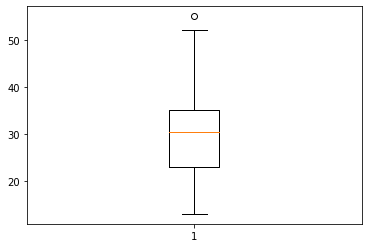

In [ ]:
plt.boxplot(championships['Winner Score'])
plt.show() #Necesario para que no salga tanta información innecesaria

Los **DIAGRAMAS DE VIOLIN** son similares a los diagramas de caja, excepto que también muestran **la densidad de probabilidad** de los datos en diferentes valores, generalmente suavizados por un estimador de densidad kernel (Nucleo). Por lo general, un diagrama de violín incluirá todos los datos que se encuentran en un diagrama de caja: un marcador para la mediana de los datos; un cuadro o marcador que indica el rango intercuartílico; y posiblemente todos los puntos de muestra, si el número de muestras no es demasiado alto.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


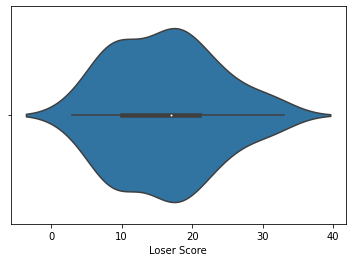

In [ ]:
sns.violinplot(championships['Loser Score'])

### ¿Cuál es la mayor y menor diferencia de puntos en cada partido? ✔

Gracias a la siguiente tabla y los resultados obtenidos podemos observar que la gran mayoría de los Super Bowls son juegos cerrados. Esto tiene sentido, ya que los equipos que logran llegar hasta la Super Bowl son equipos muy preparados.

**HISTOGRAMA**  

Es un gráfico de columnas que muestra datos de frecuencia

In [ ]:
plt.hist(championships.Diferencia)
plt.title('Histograma de la diferencia de puntos en el Super Bowl') #Se puede cambiar
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.show()

NameError: ignored

In [ ]:
championships[championships['Diferencia'] == championships['Diferencia'].min()]

El juego más cerrado de la historia de los Super Bowls fue la derrota de los Buffalo Bills ante los New York Giants por **1 punto** en 1991, dicho partido se recuerda por el intento fallido de gol de campo de Scott Norwood en el último segundo que se fue desviado a la derecha, dandole la victoria al equipo enemigo.

In [ ]:
championships[championships['Diferencia'] == championships['Diferencia'].max()]

En el siguiente paso podemos observar que la mayor discrepancia de puntos de la historia fue de **45 puntos**, donde el miembro del Salón de la Fama Joe Montana logró llevar al equipo 49ers de San Francisco a la victoria en 1990, un año antes del partido más reñido de la historia.

### ¿Cuál es el equipo que más veces ha perdido? ✔

Los **DIAGRAMAS DE BARRAS** son una forma de representar gráficamente un conjunto de datos o valores mediante barras rectangulares de longitud proporcional a los valores representados. Los gráficos de barras pueden ser usados para comparar cantidades de una variable en diferentes momentos o diferentes variables para el mismo momento. Las barras pueden orientarse horizontal o, como en este caso, verticalmente.

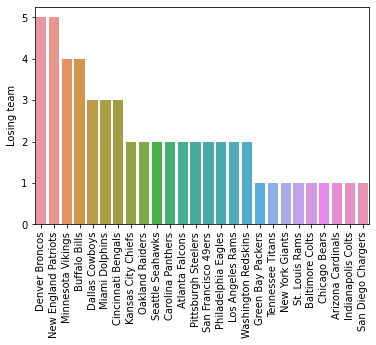

In [ ]:
sns.barplot(x = championships['Losing team'].value_counts().index, y=championships['Losing team'].value_counts()) 
plt.xticks(rotation = 'vertical')
plt.show()

Los equipos que más veces han perdido son 'Denver Broncos' y 'New England Patriots' con 5 partidos cada uno.

### ¿Cuál es el equipo que más veces ha ganado? ✔

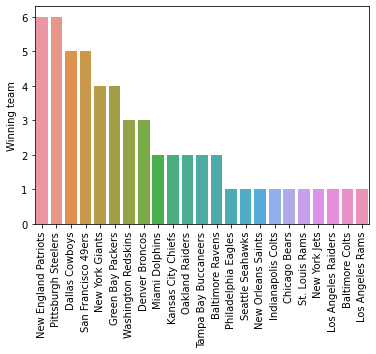

In [ ]:
sns.barplot(x = championships['Winning team'].value_counts().index, y=championships['Winning team'].value_counts()) 
plt.xticks(rotation = 'vertical')
plt.show()

Los equipos que más veces han ganado son 'New England Patriots' y 'Pittsburg Steelers' con 6 ediciones cada uno.


### ¿Cuál es el equipo que más veces ha participado? ✔

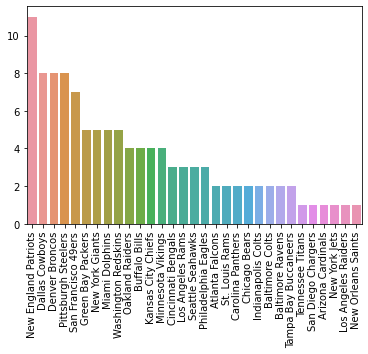

In [ ]:
df=pd.concat([championships['Losing team'], championships['Winning team']])
sns.barplot(x = df.value_counts().index, y=df.value_counts()) 
plt.xticks(rotation = 'vertical')
plt.show()

El equipo que más veces ha jugado el Super Bowl es 'New England Patriots', el cual lo ha jugado 11 veces.

### ¿Cuál es la asistencia media al estadio? 
Hay que quitar el que se jugó en pandemia, no debería cintar en esta estadística?

In [ ]:
championships['Attendance'].describe()

count        56.000000
mean      75983.750000
std       12410.607263
min       24835.000000
25%       70969.750000
50%       73815.500000
75%       79659.750000
max      103985.000000
Name: Attendance, dtype: float64

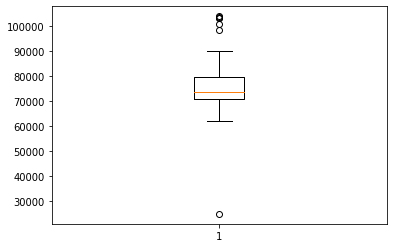

In [ ]:
plt.boxplot(championships['Attendance'])
plt.show()

### ¿Cuál ha sido el superbowl que más ha tenido audiencia?

In [ ]:
championships[championships['Attendance'] == championships['Attendance'].max()]
#pima[pima['Glucose']==pima['Glucose'].max()]

,Super Bowl,Date,Winning team,Losing team,Venue,Attendance,Referee,Cities,State,Winner Score,Loser Score,Diferencia
13,14,"January 20, 1980",Pittsburgh Steelers,Los Angeles Rams,Rose Bowl,103985,Fred Silva,Pasadena,California,31,19,12


### ¿cuál ha sido la ciudad con mayor audiencia ?

In [ ]:
championships[championships['Attendance'] == championships['Attendance'].max()]

,Super Bowl,Date,Winning team,Losing team,Venue,Attendance,Referee,Cities,State,Winner Score,Loser Score,Diferencia
13,14,"January 20, 1980",Pittsburgh Steelers,Los Angeles Rams,Rose Bowl,103985,Fred Silva,Pasadena,California,31,19,12


###¿ Cuál es la ciudad que más veces ha celebrado el super bowl y cuál estadio lo ha hecho?


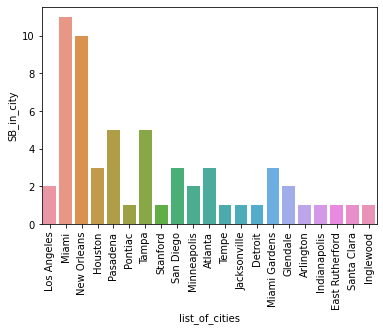

,list_of_cities,SB_in_city
1,Miami,11


In [ ]:
list_of_cities = []
SB_in_city = []

for city in championships['Cities']:
  if city not in list_of_cities:
    list_of_cities.append(city)                                       #creamos una lista con las ciudades sin repeetir
    SB_in_city.append(str(championships['Cities'].array).count(city)) #Contamos la cantidad de apariciones de cada ciudad
    
Games_per_city = pd.DataFrame()
Games_per_city['list_of_cities'] = list_of_cities
Games_per_city['SB_in_city'] = SB_in_city

gpc = Games_per_city

sns.barplot(x = 'list_of_cities', y = 'SB_in_city', data = gpc)
plt.xticks(rotation = 'vertical')
plt.show()

Games_per_city[Games_per_city['SB_in_city'] == Games_per_city['SB_in_city'].max()]

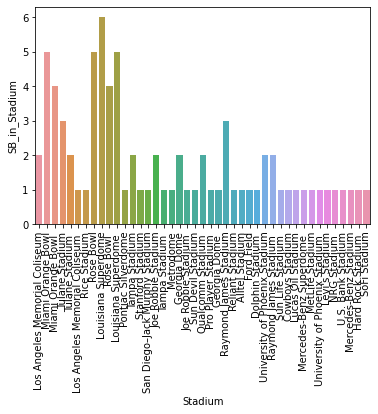

,Stadium,SB_in_Stadium
8,Louisiana Superdome,6


In [ ]:
SB_in_stadium = []
list_of_stadium = []

for stadium in championships['Venue']:
  if stadium not in list_of_stadium:
    list_of_stadium.append(stadium)
    SB_in_stadium.append(str(championships['Venue'].array).count(stadium))

Games_per_stadium = pd.DataFrame()
Games_per_stadium['Stadium'] = list_of_stadium
Games_per_stadium['SB_in_Stadium'] = SB_in_stadium

gps = Games_per_stadium

sns.barplot(x = 'Stadium', y = 'SB_in_Stadium', data = gps)
plt.xticks(rotation = 'vertical')
plt.show()

Games_per_stadium[Games_per_stadium['SB_in_Stadium'] == Games_per_stadium['SB_in_Stadium'].max()]

###¿Qué partido se ha ganado con mayor ventaja? ¿Qué equipos jugaron?

### ¿Qué partido se ha ganado con menor diferencia de puntos?

### ¿Con que atributo tiene mayor relación la asistencia ? 

### Media de puntos de los partidos 

### ¿Cual ha sido el Super Bowl más visto? (Televisivamente hablando)

**TENDENCIA** 

Es un grafico de regresion lineal que toma el angulo de la recta en relacion al numero de personas visualizando el super Bowl.

Comparar precio de anuncio 

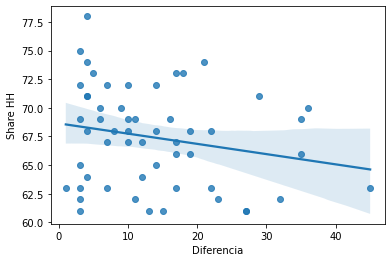

In [ ]:
games_tv = pd.merge(ratings[ratings['Super Bowl']>1], championships, on='Super Bowl')


# Create a scatter plot with a linear regression model fit
sns.regplot(x= 'Diferencia', y= 'Share HH', data=games_tv)

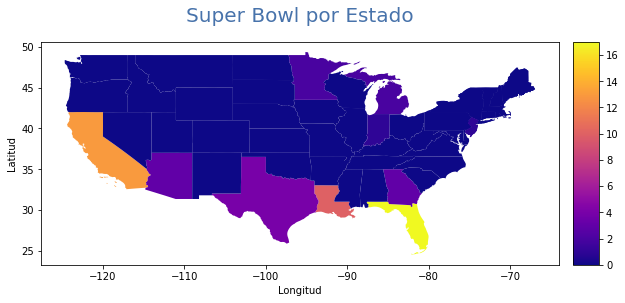

In [ ]:
states = gpd.read_file('/content/usa-states-census-2014.shp')

#Juegos por estado
list_of_states = []
SB_in_states = []

for state in championships['State']:
  state = quitarvaciof(state) #Algunas veces el estado tiene un espacio final al final, lo quitamos

  if state not in list_of_states:
    list_of_states.append(state)                                       #creamos una lista con las ciudades sin repeetir
    SB_in_states.append(str(championships['State'].array).count(state)) #Contamos la cantidad de apariciones de cada ciudad

#Quitamos el espacio al principio en estados
for i in range(len(list_of_states)):
  list_of_states[i] = list_of_states[i][1:]

  
Games_per_states = pd.DataFrame()
Games_per_states['list of states'] = list_of_states
Games_per_states['Super Bowl in state'] = SB_in_states

sb_per_state = []

for i in states['NAME'].array:
  if i in Games_per_states['list of states'].array:
    sb_per_state.append(int(Games_per_states[Games_per_states['list of states'] == i ]['Super Bowl in state']))
  else:
     sb_per_state.append(0)
states['Game per state'] = sb_per_state    

states.head(5)

# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Super Bowl por Estado', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
states.plot(column='Game per state', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=5)
 


In [ ]:
x = ratings['Adjusted to inflation 2021'].apply(lambda x: x.str.replace('[^\w\s]',''))s
x


plt.subplot(3, 1, 1)
plt.plot(ratings['Super Bowl'], ratings['Avg. viewers(millions)'], color= '#648FFF')
plt.title('Average Number of US Viewers')

# Activate the middle subplot
plt.subplot(3, 1, 2)
plt.plot(ratings['Super Bowl'],ratings['Rating HH'], color= '#DC267F')
plt.title('Household Rating')

# Activate the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(ratings['Super Bowl'], ratings['Adjusted to inflation 2021'], color= '#FFB000')
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots
plt.tight_layout()

AttributeError: ignored